<i>## Comments will be provided using this format. Key takeaway: groups are encouraged to change the formatting, but not the structure. Groups are also allowed to create additional notebooks - for instance, create one notebook for data exploration, and one notebook for each preprocessing-modelling-evaluation pipeline -, but must strive to keep an unified style across notebooks.</i>

#### NOVA IMS / BSc in Data Science / Text Mining 2024/2025
### <b>Group Project: "Solving the Hyderabadi Word Soup"</b>
#### Notebook `Notebook Title`

#### Group:
- `Group member #1`
- `(...)`
- `Group member #5`

#### <font color='#BFD72'>Table of Contents </font> <a class="anchor" id='toc'></a> 
- [1. Data Understanding](#P1)
- [2. General Data Preparation](#P2) 
- [3. Multilabel Classification (Information Requirement 3311)](#P3)
    - [3.1 Specific Data Preparation](#P31)
    - [3.2 Model Implementation](#P32)
    - [3.3 Model Evaluation](#P3n)
- [4. Sentiment Analysis (Information Requirement 3312)](#P4)
    - [4.1 Specific Data Preparation](#P41)
    - [4.2 Model Implementation](#P42)
    - [4.3 Model Evaluation](#P43)
- [...]
- [N. Additional Tasks (Information Requirements 332n)](#Pn)
    - [N.1 Specific Data Preparation](#Pn1)
    - [N.2 Model Implementation](#Pn2)
    - [N.3 Model Evaluation](#Pn3)

<i>## Note that the notebook structure differs from the report: instead of following the CRISP-DM phases and then specifying the different problems inside the phases, the notebook is structured by problem, with the CRISP-DM phases being defined for each specific problem.

In [33]:
## All imports must be concentrated on a cell that immediately follow the table of contents
%load_ext autoreload
%autoreload 2

import time
import pandas as pd
import numpy as np
from utils.pipeline_v1d import main_pipeline
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import os
from wordcloud import WordCloud
import re
import nltk
import plotly.express as px
from tqdm import tqdm
from collections import Counter
from collections import defaultdict

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<font color='#BFD72F' size=5>1. Data Exploration</font> <a class="anchor" id="P1"></a>
  
[Back to TOC](#toc)

<i>## Use markdown cells to describe the purpose of the code cells that follow them.</i>

In [3]:
reviews = pd.read_csv("data_hyderabad/10k_reviews.csv")
restaurants = pd.read_csv("data_hyderabad/105_restaurants.csv")

In [4]:
reviews

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


In [5]:
reviews.describe(include = "all")

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [7]:
reviews.dropna(subset=['Review'], inplace=True)
reviews[reviews["Review"].isna()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures


In [8]:
reviews.drop(columns = ["Reviewer", "Time", "Pictures"], inplace= True)

In [9]:
restaurants

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)


In [10]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [11]:
restaurants.describe(include="all")

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [12]:
dicti = {}
for i in range(len(restaurants)):
    dicti[restaurants["Name"][i]] = restaurants["Cuisines"][i]

In [13]:
reviews["Cuisine"] = None
for i in reviews.index:
    reviews["Cuisine"][i] = dicti[reviews["Restaurant"][i]]

In [14]:
reviews

,Restaurant,Review,Rating,Metadata,Cuisine
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers","Chinese, Continental, Kebab, European, South I..."
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers","Chinese, Continental, Kebab, European, South I..."
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers","Chinese, Continental, Kebab, European, South I..."
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower","Chinese, Continental, Kebab, European, South I..."
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers","Chinese, Continental, Kebab, European, South I..."
...,...,...,...,...,...
9995,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers","Chinese, Seafood"
9996,Chinese Pavilion,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers","Chinese, Seafood"
9997,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers","Chinese, Seafood"
9998,Chinese Pavilion,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers","Chinese, Seafood"


In [15]:
print(reviews["Review"].sample(12))

9061    The food was superb!\nOrdered:\nHoney chilli c...
8924    Sorry to say but got rotten tomato and cucumbe...
7026    Amazing place with historical collection , col...
9252    Visited this place for dinner. Classy ambience...
5698    I am sorry to say this but nothing, i mean not...
2590    Visited this place on a Saturday evening cause...
9575                                        very bad item
5773                                                 good
5380    delivery person is not all good very much trou...
230     Oh I had so much hope on this place looking at...
8133    aloo Paratha and pulav which I have tried were...
2556    Love the terrace sitting area. The music and c...
Name: Review, dtype: object


In [16]:
print(reviews["Cuisine"].sample(12))

2464                   North Indian, Chinese, Continental
1098                 Street Food, North Indian, Fast Food
8274    North Indian, Chinese, Seafood, Biryani, Hyder...
110                        Biryani, North Indian, Chinese
429     Asian, Continental, North Indian, Chinese, Med...
706                                              Lebanese
7912          North Indian, Chinese, Continental, Biryani
3075                   Andhra, South Indian, North Indian
5573                                         Cafe, Bakery
5293                       North Indian, Biryani, Chinese
4057              European, Italian, Continental, Spanish
9222    Continental, Italian, North Indian, Chinese, A...
Name: Cuisine, dtype: object


From the data exploration we concluded:
- There were missing values e some columns however, the only meaningful one was the `Review` and those were dropped, the other missing were kept
- We joined the cuisines from the `restaurants` to the `reviews` dataset so that we have the important information merged in only one dataset
- After taking samples of the `Review`, it is a string of words, numbers and emojis
- After taking samples of the `Cuisine`, it is a of types of cuisines seperated by comas

<font color='#BFD72F' size=5>2. Visualization and understanding</font> <a class="anchor" id="P1"></a>
  
[Back to TOC](#toc)


In [17]:
reviews["Review_feat_extraction"] = reviews["Review"].apply(lambda x: main_pipeline(x, print_output= False, tokenized_output=False, no_punctuation = False))

In [18]:
n = np.random.randint(0,9555)
print(reviews.iloc[n]["Review"])
print(reviews.iloc[n]["Review_feat_extraction"])

I have given my b'day treat to my friends. Guys! It's an awesome place to dine. Their Starters are so good to have. We had great time with Jayant.
give b'day treat friend . guys! awesome place dine . starters good . great time jayant.


<font color='#BFD72F' size=4>2.1 BOW plot for the reviews</font> <a class="anchor" id="P1"></a>
  
[Back to TOC](#toc)

In [19]:
def word_freq_calculator(td_matrix, word_list, df_output=True):
    #counts the number of times a word appears
    word_counts = np.sum(td_matrix, axis=0).tolist()
    if df_output == False:
        word_counts_dict = dict(zip(word_list, word_counts))
        return word_counts_dict
    else:
        word_counts_df = pd.DataFrame({"words":word_list, "frequency":word_counts})
        word_counts_df = word_counts_df.sort_values(by=["frequency"], ascending=False)
        return word_counts_df

In [20]:
#Create a BOW and get the number of times each word in the reviews appears
bow_vectorizer = CountVectorizer()
clean_bow_td_matrix = bow_vectorizer.fit_transform(reviews["Review_feat_extraction"]).toarray()
clean_bow_word_list = bow_vectorizer.get_feature_names_out().tolist()
clean_bow_words_freq = word_freq_calculator(clean_bow_td_matrix, clean_bow_word_list)
clean_bow_words_freq

,words,frequency
4929,good,7621
4456,food,6567
8651,place,6003
10166,service,3250
8027,order,3144
...,...,...
7828,nthis,1
7827,ntg,1
2935,crafty,1
2938,crampy,1


In [21]:
reviews["Clean_BOW"] = clean_bow_td_matrix.tolist()

In [22]:
def plot_term_frequency(df, nr_terms, df_name, show=True):
    
    # Create the Seaborn bar plot
    plt.figure(figsize=(10, 8))
    sns_plot = sns.barplot(x='frequency', y='words', data=df.head(nr_terms))  # Plotting top 20 terms for better visualization
    plt.title('Top 20 Term Frequencies of {}'.format(df_name))
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    if show:
        plt.show()

    fig = sns_plot.get_figure()

    return fig

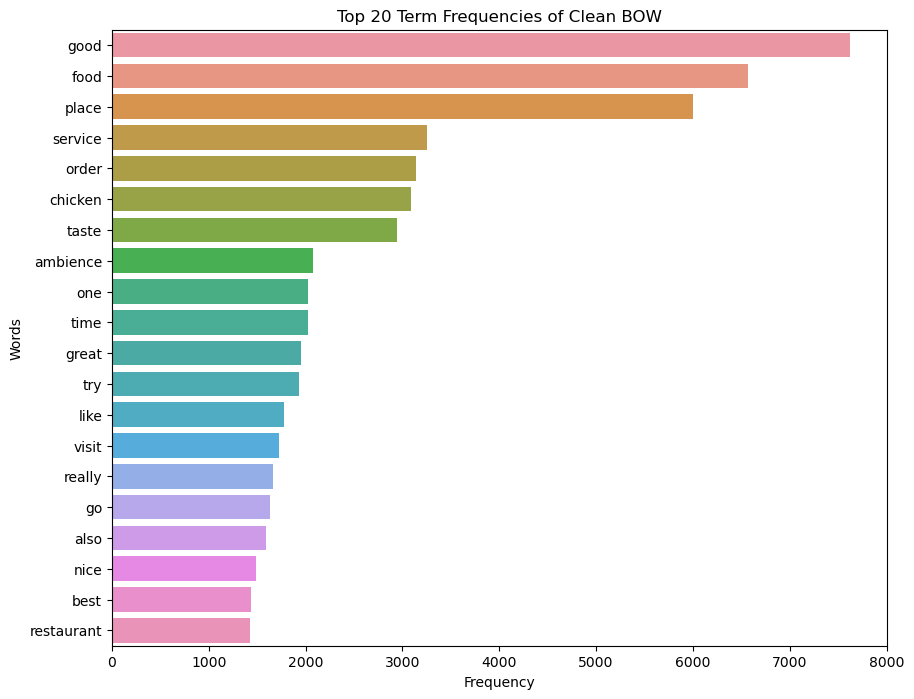

In [23]:
graph_clean_freq = plot_term_frequency(clean_bow_words_freq, 20, "Clean BOW", show = False)

<font color='#BFD72F' size=4>2.2 TF-IDF word cloud for the reviews</font> <a class="anchor" id="P1"></a>
  
[Back to TOC](#toc)

In [24]:
def word_cloud_generator(folder_path,reviews, wc, path, list_output = False):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    tfidf_vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b")
    tfidf_td_matrix = tfidf_vectorizer.fit_transform(reviews["Review_feat_extraction"]).toarray()
    word_list = tfidf_vectorizer.get_feature_names_out().tolist()
    tfidf_df = pd.DataFrame({"words":word_list,"frequency":tfidf_vectorizer.idf_.tolist()})
    tfidf_df = tfidf_df.sort_values(by="frequency", ascending=True)

    ##TFIDF visualization
    tfidf_df = word_freq_calculator(tfidf_td_matrix,word_list, df_output=False)
    wc.generate_from_frequencies(tfidf_df)
    wc.to_file(os.path.join(folder_path, path))
    
    if list_output:
        return tfidf_td_matrix.tolist()

In [25]:
wc = WordCloud(background_color="white",max_words=120, width = 220,height = 220, color_func=lambda *args, **kwargs: (0,0,0))
reviews["Clean_TDIDF"] = word_cloud_generator("graphs",reviews, wc, path="WC_TFIDF.png", list_output=True)


In [26]:
reviews["Clean_TDIDF"]

0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
9995    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
9996    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
9997    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
9998    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
9999    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: Clean_TDIDF, Length: 9955, dtype: object

In [27]:
def pos_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    
    pos_tag = nltk.tag.pos_tag([word])[0][1]
    
    if type(re.match("NN",pos_tag)) is not type(None):
        return (0,0,255)
    elif type(re.match("VB",pos_tag)) is not type(None):
        return (255,0,0)
    elif type(re.match("JJ|RB",pos_tag)) is not type(None):
        return (0,255,0)
    else:
        return (0,0,0)
    

In [28]:
wc_pos = WordCloud(background_color="white",max_words=240, width = 220,height = 220, color_func=pos_color_func)
word_cloud_generator("graphs",reviews, wc_pos, path = "WC_TFIDF_Colored.png")

<font color='#BFD72F' size=4>2.3 BOW treemap for the reviews</font> <a class="anchor" id="P1"></a>
  
[Back to TOC](#toc)

In [29]:
def get_pos_tag(word):
    tag = nltk.tag.pos_tag([word])[0][1]
    return tag

In [30]:
clean_bow_words_freq["pos_tag"] = clean_bow_words_freq["words"].apply(get_pos_tag)

#create a tree map
fig = px.treemap(clean_bow_words_freq[:350], 
                path=[px.Constant('Reviews'), 'pos_tag','words'], 
                values='frequency',
                color='frequency',
                color_continuous_scale='viridis',
                )

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

<font color='#BFD72F' size=4>2.4 BOW plot for the cuisine types</font> <a class="anchor" id="P1"></a>
  
[Back to TOC](#toc)

In [31]:
#Create a BOW and get the number of times each type of cuisine appears
bow_vectorizer = CountVectorizer()
cuisine_td_matrix = bow_vectorizer.fit_transform(reviews["Cuisine"]).toarray()
cuisine_word_list = bow_vectorizer.get_feature_names_out().tolist()
cuisine_words_freq = word_freq_calculator(cuisine_td_matrix, cuisine_word_list)
cuisine_words_freq

,words,frequency
23,indian,7095
35,north,6095
10,chinese,4095
11,continental,2084
18,food,1776
7,biryani,1498
3,asian,1400
25,italian,1400
13,desserts,1299
16,fast,1276


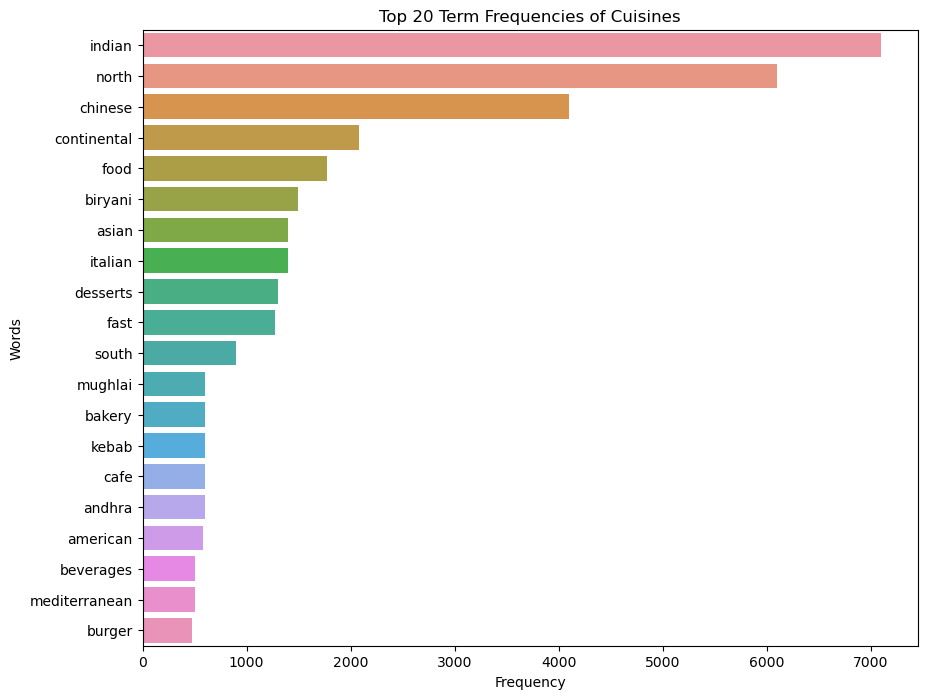

In [32]:
graph_clean_freq = plot_term_frequency(cuisine_words_freq, 20, "Cuisines", show = False)

<font color='#BFD72F' size=4>2.5 Co-occurrence in `Review` visualization</font> <a class="anchor" id="P1"></a>
  
[Back to TOC](#toc)

In [36]:
reviews["Review_cooccurrence_analysis"] = reviews["Review"].apply(lambda x: main_pipeline(x, print_output= False, tokenized_output=True, no_punctuation = True))

In [37]:
def cooccurrence_matrix_window_generator(preproc_sentences, window_size):

    co_occurrences = defaultdict(Counter)

    # Compute co-occurrences
    for sentence in tqdm(preproc_sentences):
        for i, word in enumerate(sentence):
            for j in range(max(0, i - window_size), min(len(sentence), i + window_size + 1)):
                if i != j:
                    co_occurrences[word][sentence[j]] += 1

    #ensure that words are unique
    unique_words = list(set([word for sentence in preproc_sentences for word in sentence]))

    # Initialize the co-occurrence matrix
    co_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)

    # Populate the co-occurrence matrix
    word_index = {word: idx for idx, word in enumerate(unique_words)}
    for word, neighbors in co_occurrences.items():
        for neighbor, count in neighbors.items():
            co_matrix[word_index[word]][word_index[neighbor]] = count

    # Create a DataFrame for better readability
    co_matrix_df = pd.DataFrame(co_matrix, index=unique_words, columns=unique_words)

    co_matrix_df = co_matrix_df.reindex(co_matrix_df.sum().sort_values(ascending=False).index, axis=1)
    co_matrix_df = co_matrix_df.reindex(co_matrix_df.sum().sort_values(ascending=False).index, axis=0)

    # Return the co-occurrence matrix
    return co_matrix_df

In [83]:
##Context window = 2 words
reviews_cooccurrence_window = cooccurrence_matrix_window_generator(reviews["Review_cooccurrence_analysis"].tolist(),5)

100%|██████████| 9955/9955 [00:01<00:00, 5325.87it/s]


In [84]:
## Plot the most common co-occurrences
fig = px.imshow(reviews_cooccurrence_window.iloc[:50, :50], color_continuous_scale='reds', 
                labels=dict(x="Words", y="Words", color="Count"),
                title="Co-occurrence matrix for the Reviews (50 most frequent co-occurring words in a 5-token context window)", 
                width=1200, height=1200)

fig.show()

<font color='#BFD72F' size=4>2.5 Co-occurrence in `Cuisines` visualization</font> <a class="anchor" id="P1"></a>
  
[Back to TOC](#toc)

In [133]:
reviews["Cuisine_spit"] = reviews["Cuisine"].apply(lambda x: x.lower().split(", "))

In [134]:
print(reviews["Cuisine_spit"].sample(1))

2665    [mexican, italian, north indian, chinese, salad]
Name: Cuisine_spit, dtype: object


In [141]:
cuisines_cooccurrence_window = cooccurrence_matrix_window_generator(reviews["Cuisine_spit"].tolist(),10)

100%|██████████| 9955/9955 [00:00<00:00, 175091.71it/s]


In [144]:
fig = px.imshow(cuisines_cooccurrence_window.iloc[:, :], color_continuous_scale='reds', 
                labels=dict(x="Words", y="Words", color="Count"),
                title="Co-occurrence matrix for the Cuisines (All co-occurring words)", 
                width=1200, height=1200)

fig.show()